In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

# 15-22

Using conservation of momentum, determine the final velocity of a 4Mg rocket sled. Find this at the time t=35s.


For this problem we have m1v1 + j = m1v2. In this assumption, we have v1=0, so we get j=m1v2. Meaning if we directly evaluate the integrals we can determine the final velocity.

In [7]:
mass = 4 # [Mg] -> units cancel out with kN and Mg
t = symbols("t", real=True)

area_1 = integrate(4*sqrt(t), (t, 0, 25)) # find the area of the first curve
area_2 = 0.5 * 20 * (35 - 25) # the second area is just a triangle

j = area_1 + area_2

v_final = j / mass
print("Final Velocity:\t{} [m/s]".format(v_final))

Final Velocity:	108.333333333333 [m/s]


This is a pretty reasonable velocity here. We would expect something pretty high given that it is a sled rocket running for half a minute.

Next we will find the final displacement. This is mostly based off of a lot of assumptions. v1=0, x1=0. 

Here we have two equations, 4sqrt(t) and y = -2t + 70. Integrating these two with respect to time gives us the final displacement. That is we have F/m = a and itegrating that twice.

In [15]:
F_1 = 4 * sqrt(t)
F_2 = -2*t + 70

# evaluating the first curve
a_1 = F_1 / mass
x_1 = integrate(integrate(a_1, (t)), (t, 0, 25)) # find the first displacement

a_2 = F_2 / mass
x_2 = integrate(integrate(a_2, (t)), (t, 25, 35)) # find the second displacement

total_x = x_1.evalf() + x_2.evalf()

print("Total Displacement:\t{} [m]".format(total_x))

Total Displacement:	3812.50000000000 [m]


This seems like a pretty reasonable displacement considering how fast the rocket sled was going, so this does not seem too outlandish.

# 15-34

We are interested in this problem with finding the average impulse on a ball as it hits a bat. We first need to use kinematics to solve this problem though.

Our first step is to solve for v2 and time of flight t_f

In [30]:
v2, v1, t_f, m_b, theta, dx, yi, yf, g, dt = symbols("v_2 v_1 t_f m_b theta dx y_i y_f g t", real=True)
# we find our first equation of motion to be
t = dx / (v2 * cos(theta)) # from horizontal projectile motion

# we find our second equation of motion to be
# for SymPy syntax I have to do things backwards
eqn = (yi - yf) + v2*sin(theta)*t + 0.5 * g * t**2
# Now we want to start reducing terms by substituting
eqn = eqn.subs([(yi, 0.75), (yf, 2.5), (g, 9.81), (theta, pi/6), (dx, 100)])

v_2 = sqrt(65400 / 55.985) # SymPy is having problems with algebraicly solving

# now we can go to m1v1 + j = m1v2

j = (m_b*(v_2 + v1)) / dt
j = j.subs([(m_b, 0.15), (v1, 30), (dt, 0.75E-3)])
print("Impulse:\t{} [N*s]".format(j))


Impulse:	12835.7005362959 [N*s]


This is not too crazy of a number here, we had about 30 m/s going to the right and 30 m/s going to the left, adding the two vectors gives us a rather large impulse to cause that change in direction.

# F15-12

The cannon and support without a projectile have a mass of 250kg. If a 20-kg projectile is fired from the cannon with a velocity of 400 m/s, measured relative to the cannon, determine the speed of the projectile as it leaves the barrel of the cannon. Neglect rolling resistance.

In [33]:
m_cannon, m_projectile, v_cannon2, v_projectile2 = symbols("m_can m_proj v_can_2 v_proj_2")
# Here, as always, we need to conserve momentum, so mcv1 + mpv1 = mcv2 + mpv2
# We are under the assumption that the cannon is not moving before the projectile is shot
# this gives mcv2 = -mpv2
# where vc2 = -mpv2/mc

v_cannon2 = -(m_projectile/m_cannon) * v_projectile2

pprint(v_cannon2)
print("\n")
v_cannon2 = v_cannon2.subs([(m_projectile, 20), (m_cannon, 250), (v_projectile2, 400)])

print("Cannon Velocity:\t{} [m/s]".format(v_cannon2))

-m_proj⋅v_proj_2 
─────────────────
      m_can      


Cannon Velocity:	-32 [m/s]


This is a pretty high velocity here, more than I would anticipate for a cannon. But again, we did not consider things like rolling resistance and friction. Although, we do have v_cannon << v_projectile which was expected.

# 15-39

A ballistic pendulum consists of a 4-kg wooden block originally at rest, theta=0. When a 2g bullet strikes and becomes embedded in it, it is observed that the block swings upward to a maximum angle of theta=6[deg]. Estimate the initial velocity of the bullet.

From conservation of momentum we can derive the equation below:

r⋅(m_b + mₚ)⋅sin(θ)
───────────────────
       m_b⋅t       


        ⎛                  ________⎞
        ⎜                 ╱ 5   √5 ⎟
        ⎜           √3⋅  ╱  ─ - ── ⎟
        ⎜  √5   1      ╲╱   8   8  ⎟
2501.25⋅⎜- ── - ─ + ───────────────⎟
        ⎝  8    8          2       ⎠
────────────────────────────────────
                 t                  


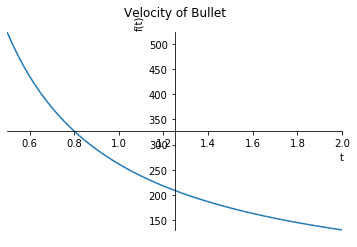

In [43]:
m_b, m_p, vi, r, theta, t = symbols("m_b m_p v_i r theta t", real=True)

vi = ((m_b + m_p) / m_b) * (r*sin(theta) / t)

pprint(vi)

# now we want to start substituting in values again...
vi = vi.subs([(m_b, 2E-3), (m_p, 4), (r, 1.25), (theta, 6 * pi / 180)])

print("\n")

pprint(vi) # so now we have reduced our terms.

plot(vi, (t, 0.5, 2), title="Velocity of Bullet")

As we can see from this graph here [1/2 <= t <= 2] [s], the bullet would very reasonably have a large velocity. Very likely the most probably velocity is at the zero-point where time t~0.8seconds and the velocity of the bullet correlates to ~330-340 [m/s]. This seems entirely reasonable when considering how time works. With increasing t we have decreasing incident velocity for the bullet, which does not make too much sense. Additionally, since this distribtion is 1/x, decreasing time causes the velocity to become infinite, which is why I argued earlier that the velocity is ~330 m/s (about the speed of sound).